In [2]:

# 1. Import necessary libraries

import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)

# 2. Load the dataset

df = pd.read_csv("water_potability.csv")


# 3. Explore the dataset

# Shape of dataset
print("Shape of dataset:", df.shape)

# First 5 rows
print("\nFirst 5 rows of dataset:")
print(df.head())

# Info about dataset
print("\nDataset Info:")
print(df.info())

# Statistical summary
print("\nStatistical Description:")
print(df.describe())

# Missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Shape of dataset: (3276, 10)

First 5 rows of dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (t

In [12]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("water_potability.csv")


imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

#  Split into features (X) and target (y)

X = df_imputed.drop("Potability", axis=1)
y = df_imputed["Potability"]

# Split train/test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#  Scale features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 6. Choose & train ML model

model = RandomForestClassifier(
    n_estimators=200, random_state=42, class_weight="balanced"
)
model.fit(X_train_scaled, y_train)


#  Evaluate the model

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("✅ Model: Random Forest Classifier")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Model: Random Forest Classifier
Accuracy: 0.6707317073170732

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.91      0.77       400
         1.0       0.68      0.29      0.41       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.59       656
weighted avg       0.67      0.67      0.63       656


Confusion Matrix:
 [[365  35]
 [181  75]]


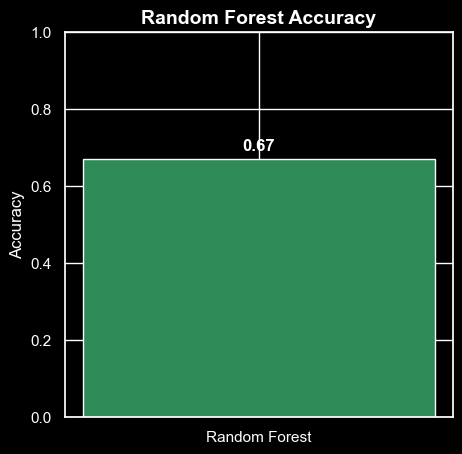

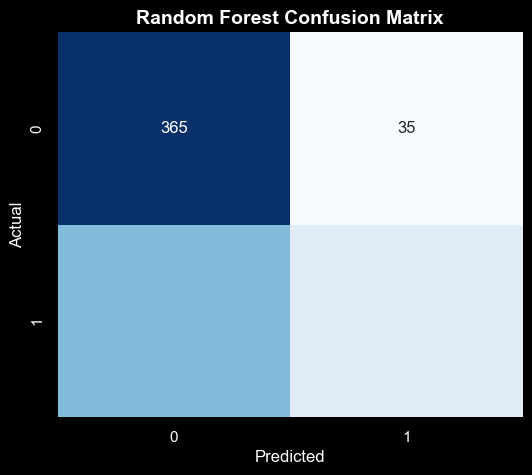

In [25]:
plt.figure(figsize=(5,5))
plt.bar(["Random Forest"], [accuracy], color="seagreen")
plt.ylim(0,1)
plt.title("Random Forest Accuracy", fontsize=14, weight="bold")
plt.ylabel("Accuracy")
plt.text(0, accuracy+0.02, f"{accuracy:.2f}", ha="center", fontsize=12, weight="bold")
plt.show()

# ==========================================
# Visual 2: Confusion Matrix Heatmap
# ==========================================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix", fontsize=14, weight="bold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
